In [2]:
# Import the holy trinity of data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some styling for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Define the path to our raw data folder
DATA_PATH = '../data/raw/'

# Load the datasets into pandas DataFrames
try:
    books_df = pd.read_csv(f'{DATA_PATH}books.csv')
    ratings_df = pd.read_csv(f'{DATA_PATH}ratings.csv')
    tags_df = pd.read_csv(f'{DATA_PATH}tags.csv')
    book_tags_df = pd.read_csv(f'{DATA_PATH}book_tags.csv')
    print("All datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: {e}. Make sure the CSV files are in the 'data/raw/' directory.")

All datasets loaded successfully!


In [3]:
# Display the first 5 rows of the books dataframe
print("--- Books DataFrame Head ---")
display(books_df.head())

# Get a concise summary of the dataframe
print("\n--- Books DataFrame Info ---")
books_df.info()

# Check for missing values
print("\n--- Missing Values in Books DataFrame ---")
print(books_df.isnull().sum())

--- Books DataFrame Head ---


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...



--- Books DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count    

In [4]:
# Display the first 5 rows of the ratings dataframe
print("--- Ratings DataFrame Head ---")
display(ratings_df.head())

# Get basic statistics for the ratings
print("\n--- Ratings DataFrame Describe ---")
display(ratings_df.describe())

# Check how many unique users and books we have
print(f"\nNumber of unique users: {ratings_df['user_id'].nunique()}")
print(f"Number of books with ratings: {ratings_df['book_id'].nunique()}")

--- Ratings DataFrame Head ---


,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4



--- Ratings DataFrame Describe ---


,book_id,user_id,rating
count,981756.000000,981756.000000,981756.000000
mean,4943.275636,25616.759933,3.856534
std,2873.207415,15228.338826,0.983941
min,1.000000,1.000000,1.000000
25%,2457.000000,12372.000000,3.000000
50%,4921.000000,25077.000000,4.000000
75%,7414.000000,38572.000000,5.000000
max,10000.000000,53424.000000,5.000000



Number of unique users: 53424
Number of books with ratings: 10000


In [5]:
print("--- Tags DataFrame Head ---")
display(tags_df.head())

print("\n--- Book Tags DataFrame Head ---")
display(book_tags_df.head())

--- Tags DataFrame Head ---


,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-



--- Book Tags DataFrame Head ---


,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


C:\Users\Hp\AppData\Local\Temp\ipykernel_11216\712893216.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ratings_df, x='rating', palette='viridis')


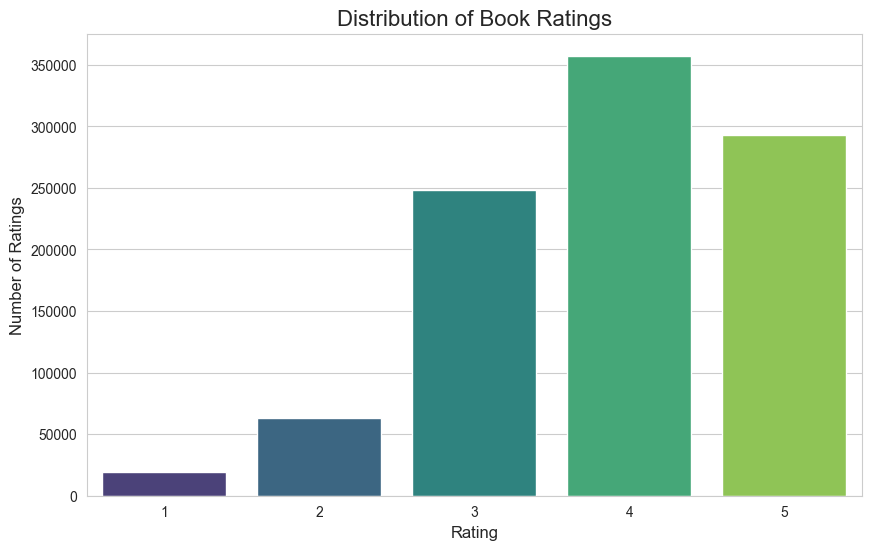

In [6]:
# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=ratings_df, x='rating', palette='viridis')
plt.title('Distribution of Book Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_11216\2388433179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_rated_books.index, x=most_rated_books.values, palette='rocket')


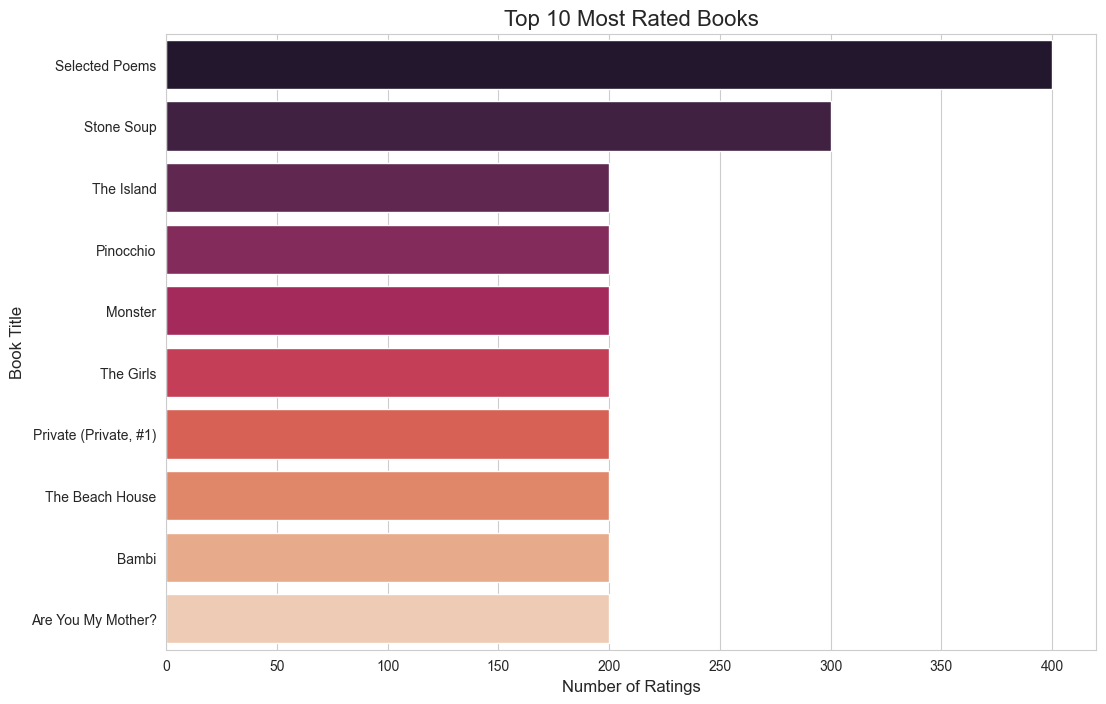

In [7]:
# Merge ratings with books to get titles
ratings_with_titles = ratings_df.merge(books_df, left_on='book_id', right_on='id')

# Count the number of ratings for each book
most_rated_books = ratings_with_titles['title'].value_counts().head(10)

# Plot the most rated books
plt.figure(figsize=(12, 8))
sns.barplot(y=most_rated_books.index, x=most_rated_books.values, palette='rocket')
plt.title('Top 10 Most Rated Books', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Book Title', fontsize=12)
plt.show()
